In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn')
%matplotlib inline

from pylab import mpl
mpl.rcParams['font.sans-serif'] = ['SimHei']
mpl.rcParams['axes.unicode_minus'] = False

In [8]:
data=pd.read_csv('data.csv')
data['日期'] = pd.to_datetime(data['日期'], format='%m/%d/%Y')
data = data.sort_values('日期')
data.head()

,日期,收盘价/最新价,开盘价,高点,低点
2527,2014-08-18,4020.50,4007.19,4022.48,4003.46
2526,2014-08-19,4040.13,4025.51,4041.50,4024.17
2525,2014-08-20,4040.70,4032.91,4046.97,4032.20
2524,2014-08-21,4047.03,4041.00,4048.95,4035.75
2523,2014-08-22,4052.75,4052.14,4060.90,4040.22


In [9]:
MA50 = 50
MA200 = 200

In [23]:
# 计算短期和长期
data['短期均值'] = data['收盘价/最新价'].rolling(window=MA50).mean()
data['长期均值'] = data['收盘价/最新价'].rolling(window=MA200).mean()

data['买入/卖出'] = 0  
# 1 为买入信号，-1为卖出信号
data['买入/卖出'][MA50:] = np.where(data['短期均值'][MA50:] > data['长期均值'][MA50:], 1, -1)

# 计算策略表现
# 计算每日回报
data['每天收益'] = data['收盘价/最新价'].pct_change()

# 计算策略回报
data['策略收益'] = data['买入/卖出'].shift(1) * data['每天收益']

# 累积策略回报
data['累计收益'] = (1 + data['策略收益']).cumprod()

# 查看数据
data[['日期', '收盘价/最新价', '短期均值', '长期均值', '买入/卖出', '累计收益']].tail(100)


,日期,收盘价/最新价,短期均值,长期均值,买入/卖出,累计收益
99,2024-03-25,18277.06,17747.6486,15995.22285,1,2.210141
98,2024-03-26,18210.54,17775.2010,16013.85285,1,2.202097
97,2024-03-27,18280.84,17804.2036,16032.61525,1,2.210598
96,2024-03-28,18254.69,17834.5718,16049.96720,1,2.207435
95,2024-04-01,18293.20,17860.7900,16066.92895,1,2.212092
...,...,...,...,...,...,...
4,2024-08-09,18513.10,19402.8914,17727.30780,1,2.238684
3,2024-08-12,18542.03,19402.9588,17746.28870,1,2.242182
2,2024-08-13,19006.43,19412.3544,17769.41265,1,2.298339
1,2024-08-14,19022.68,19420.7886,17793.97820,1,2.300304


In [24]:
# 方便绘制买入/卖出折线图
data['买入/卖出'][MA50:] = np.where(data['短期均值'][MA50:] > data['长期均值'][MA50:], 20000, -1)

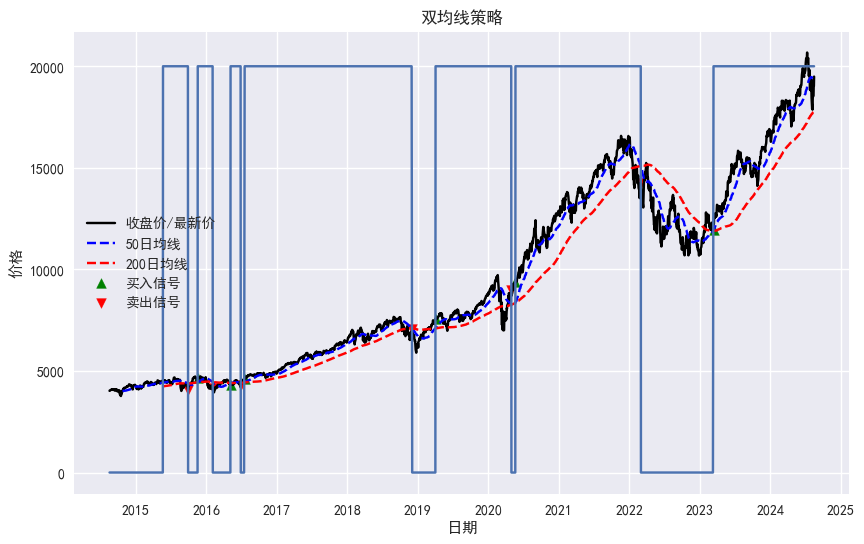

In [25]:
plt.figure(figsize=(10, 6))
plt.plot(data['日期'], data['收盘价/最新价'], label='收盘价/最新价', color='black')
plt.plot(data['日期'], data['短期均值'], label='50日均线', color='blue', linestyle='--')
plt.plot(data['日期'], data['长期均值'], label='200日均线', color='red', linestyle='--')

buy_signals = data[(data['短期均值'] > data['长期均值']) & (data['短期均值'].shift(1) <= data['长期均值'].shift(1))]
sell_signals = data[(data['短期均值'] < data['长期均值']) & (data['短期均值'].shift(1) >= data['长期均值'].shift(1))]

plt.scatter(buy_signals['日期'], buy_signals['收盘价/最新价'], marker='^', color='green', label='买入信号')
plt.scatter(sell_signals['日期'], sell_signals['收盘价/最新价'], marker='v', color='red', label='卖出信号')



plt.plot(data['日期'],data['买入/卖出'])

plt.title('双均线策略')
plt.xlabel('日期')
plt.ylabel('价格')
plt.legend()
plt.grid(True)
plt.show()